# History variables

* Volume average := $$[q]_p \equiv\sum q \Theta(p)\Delta V / \sum \Delta V$$
* Area average := $$\langle q_k \rangle_p \equiv \frac{\sum_{i,j}q_k\Theta(p)\Delta x \Delta y}{L_x L_y}$$
* Default variables:
    * time, dt
    * mass = $[\rho]$
    * totalE = $[E]$
    * x(1/2/3)Mom = $[\rho v_{(1/2/3)}]$
    * x(1/2/3)KE = $[E_{k,(1/2/3)}=\rho v_{(1/2/3)}^2/2]$
    * x(1/2/3)ME = $[B_{1/2/3}^2/2]$
    * gravPE = $[\rho\Phi]$
* Additional variables:
    * heat_ratio = $[\Gamma/\Gamma_0]$
    * x2dke = $[\delta E_{k,2}=\rho (v_2+q\Omega x)^2/2]$
    * x(1/2/3)KE_2p = $[\delta E_{k,(1/2/3)}]_{2p}$, where $2p=c+u+w$
    * F3(h2/h1/w/u/c) = 
    $0.5 ( \langle (\rho v_3)_{k=ke+1}\rangle_{(h2/h1/w/u/c)} - \langle (\rho v_3)_{k=ks}\rangle_{(h2/h1/w/u/c)})$
    * H2 = $[\rho z^2]$
    * H2(h2/h1/w/u/c) = $[\rho z^2](h2/h1/w/u/c)$
    * P = $[P]$
    * Pth(_2p) = $ \langle P_{k = kmid-1} + P_{k =kmid}\rangle_{(2p)} /2$, where $kmid= ks+ Nz/2 -1$
    * Pturb(_2p) = $\langle (\rho v_3^2)_{k = kmid-1} + (\rho v_3^2)_{k =kmid}\rangle_{(2p)}/2$
    * nmid(_2p) = $\langle \rho_{k = kmid-1} + \rho_{k =kmid}\rangle_{(2p)}/2$
    * Vmid_2p = $\langle \Theta(2p) \rangle/2$
    * V(h2/h1/w/u/c) = $[\Theta(h2/h1/w/u/c)]$
    * M(h2/h1/w/u/c) = $[\rho\Theta(h2/h1/w/u/c)]$
    * B(1/2/3) = $[B_{i,(1/2/3)}]$
    * sfr(10/40/100) = $\Sigma_{\rm SFR} (\Delta t =  (10/40/100){\rm Myr})$
    * msp = $[M_{\rm sp}/\Delta V]$ if a grid zone (i,j,k) has star particles
    * mghost = $[\rho]$ if a grid zone (i,j,k) is in control volume of star particles

# packages to be used
 * matplotlib http://matplotlib.org/
 * numpy
 * pandas http://pandas.pydata.org/
 * astropy http://www.astropy.org/

In [1]:
%matplotlib inline

In [1]:
import matplotlib
matplotlib.__version__

'2.2.4'

In [2]:
import numpy
numpy.__version__

'1.14.5'

In [3]:
import pandas
pandas.__version__

u'0.23.0'

In [4]:
import astropy
astropy.__version__

u'2.0.12'

In [5]:
import sys
sys.path.insert(0,'../')

In [6]:
from pyathena import ath_hst

ath_hst.__file__

'pyathena\\ath_hst.pyc'

# ath_hst.py

* Athena history dump can be found under the directory "id0/" with an extension ".hst"
* To read the history dump, "ath_hst.py" can be used.
* There are two functions you can use:
    * hst = ath_hst.read(hstfilename)
        * uses standard ascii io to read in the history dump
        * returns a distionary with keys corresponding to the history variable
        * using each key, you can retrive sequence of data as a numpy array
    * hst = ath_hst.read_w_pandas(hstfilename,write=True)
        * uses pandas packages to read in the history dump
        * returns pandas DataFrame contains all the information
        * if write=True, it automatically write the DataFrame to "pickle"
        * if there is a pickle file with filename = hstfilename + '.p', and the pickle file is newer than the original history file, it automatically read the "pickle" file, which is much faster than original ascii file
        * SN history dump can also be accessed with this function

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy

In [8]:
#basedir='G:/yeongu/'
id='RPS_4pc_ICM1_newacc'
#basedir='/media/woorak/data2/yeongu/' # for ubuntu
basedir='G:/yeongu/'
hstfilename=basedir+id+'/hst/'+id+'.hst'

In [9]:
hst=ath_hst.read(hstfilename)
hstp=ath_hst.read_w_pandas(hstfilename)

Reading a history file:G:/yeongu/RPS_4pc_ICM1_newacc/hst/RPS_4pc_ICM1_newacc.hst
Reading a history file:G:/yeongu/RPS_4pc_ICM1_newacc/hst/RPS_4pc_ICM1_newacc.hst.p


In [16]:
print hst.keys()

['Vmid_2p', 'F3c', 'B3', 'vol', 'gravPE', 'scalar1', 'scalar0', 'Vh1', 'x3KE', 'H2u', 'F3_lower', 'x3ME', 'totalE', 'x3Mom', 'sfr100', 'Mh2', 'x2Mom', 'Mh1', 'F3_upper', 'Pturb_2p', 'x1KE_2p', 'ftau', 'nmid_2p', 'Pturb', 'Pth_2p', 'msp', 'scalar3', 'H2h2', 'scalar2', 'nmid', 'x1Mom', 'heat_ratio', 'sfr40', 'B1', 'x1KE', 'Mc', 'x2ME', 'P_2p', 'H2w', 'H2h1', 'x2KE', 'Mu', 'F3_metal_lower', 'F3_metal_upper', 'x1ME', 'F3h1', 'Vw', 'F3h2', 'dt', 'Vh2', 'H2c', 'x2dke', 'sfr10', 'Vc', 'x2KE_2p', 'metal_sp', 'P', 'F3w', 'Pth', 'Mw', 'x3KE_2p', 'H2', 'mass', 'Vu', 'B2', 'time', 'F3u']


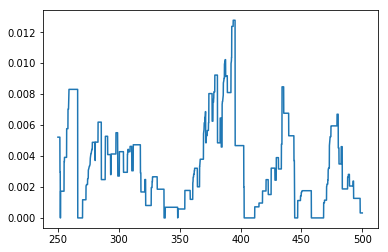

In [14]:
plt.plot(hst['time'],hst['sfr10'])
plt.show()

In [10]:
hstp=ath_hst.read_w_pandas(hstfilename)

Reading a history file:G:/yeongu/RPS_8pc_ICM2_newacc/hst/RPS_8pc_ICM2_newacc.hst.p


In [16]:
(hstp)

,time,dt,mass,totalE,x1Mom,x2Mom,x3Mom,x1KE,x2KE,x3KE,...,Mu,Mc,B1,B2,B3,sfr10,sfr40,sfr100,msp,metal_sp
0,250.000213,0.001271,0.037471,41.098401,-0.041786,0.003851,-0.063844,7.141571,9.146939,9.645753,...,0.003042,0.000273,-0.020160,0.123157,5.055632e-14,0.005217,0.011924,0.009091,0.008259,0.002335
1,250.100001,0.001453,0.037471,41.382139,-0.041735,0.003503,-0.064764,7.209273,9.222814,9.646785,...,0.003112,0.000281,-0.020119,0.123144,5.086367e-14,0.005217,0.011924,0.009091,0.008259,0.002310
2,250.200717,0.001604,0.037471,40.845115,-0.041715,0.003106,-0.065746,7.133260,9.210837,9.579861,...,0.003141,0.000279,-0.020071,0.123143,5.073831e-14,0.005217,0.011924,0.009091,0.008259,0.002298
3,250.301284,0.001596,0.037472,41.068630,-0.041689,0.002724,-0.066727,7.059611,9.154452,9.547430,...,0.003168,0.000292,-0.020020,0.123146,5.096540e-14,0.005217,0.011924,0.009091,0.008259,0.002288
4,250.401294,0.001491,0.037472,40.800009,-0.041681,0.002388,-0.067686,7.105231,9.113205,9.528515,...,0.003209,0.000312,-0.019970,0.123151,5.071334e-14,0.005217,0.011924,0.009091,0.008259,0.002286
5,250.500881,0.001307,0.037473,41.839018,-0.041660,0.002101,-0.068633,7.267343,9.186420,9.653420,...,0.003221,0.000315,-0.019924,0.123162,5.071526e-14,0.005217,0.011924,0.009091,0.008259,0.002277
6,250.601314,0.001467,0.037473,41.924903,-0.041625,0.001763,-0.069628,7.342122,9.231384,9.789743,...,0.003251,0.000329,-0.019880,0.123178,5.111103e-14,0.005217,0.011924,0.009091,0.008259,0.002265
7,250.700955,0.001473,0.037473,41.724518,-0.041527,0.001466,-0.070340,7.334954,9.208986,9.851171,...,0.003271,0.000331,-0.019833,0.123202,5.053758e-14,0.005217,0.011924,0.009091,0.008259,0.002251
8,250.800806,0.001507,0.037473,40.820068,-0.041477,0.001196,-0.071334,7.262409,9.119646,9.836497,...,0.003304,0.000354,-0.019785,0.123230,5.051143e-14,0.005217,0.011924,0.008975,0.008259,0.002240
9,250.900346,0.001441,0.037474,40.395703,-0.041463,0.000914,-0.072292,7.186632,9.030823,9.731091,...,0.003338,0.000353,-0.019737,0.123257,5.030859e-14,0.005217,0.011924,0.008975,0.008259,0.002229


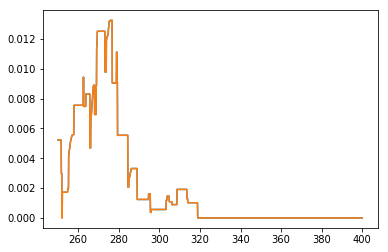

In [34]:
plt.plot(hst['time'],hst['sfr10'])
plt.plot(hstp.time,hstp.sfr10)

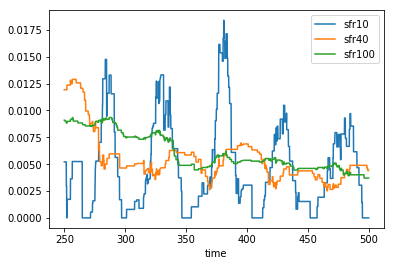

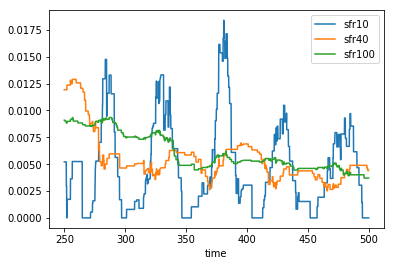

In [25]:
hstp.plot(x='time',y=['sfr10','sfr40','sfr100'])
plt.show()

# Mass Fractions from the history dump



Reading a history file:G:/yeongu/RPS_4pc_ICM2_newacc/hst/RPS_4pc_ICM2_newacc.hst
Reading a history file:G:/yeongu/RPS_4pc_ICM2_newacc/hst/RPS_4pc_ICM2_newacc.hst.p


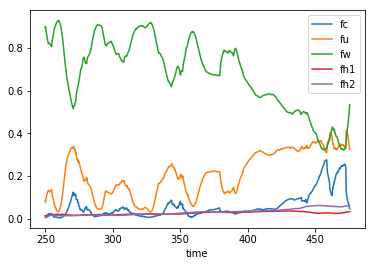

In [22]:
id='RPS_4pc_ICM2_newacc'
#basedir='/media/woorak/data2/yeongu/' # for ubuntu
basedir='G:/yeongu/'
hstfilename=basedir+id+'/hst/'+id+'.hst'

hst=ath_hst.read(hstfilename)
hstp=ath_hst.read_w_pandas(hstfilename)

phase=['c','u','w','h1','h2']
for p in phase:
    hstp['f'+p]=hstp['M'+p]/hstp['mass']
    hstp.plot(x='time',y='f'+p,ax=plt.gca())
plt.show()

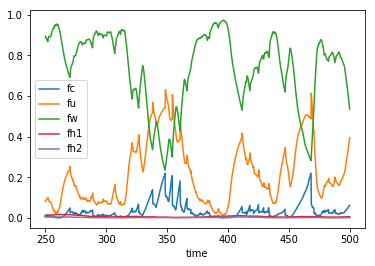

In [17]:
# to convert the mean density of each phase to fraction
phase=['c','u','w','h1','h2']
for p in phase:
    hstp['f'+p]=hstp['M'+p]/hstp['mass']
    hstp.plot(x='time',y='f'+p,ax=plt.gca())
plt.show()

# Scale heights

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/check.py:19: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.6.1

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


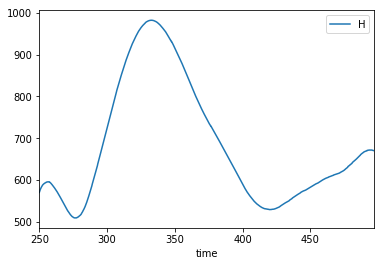

In [13]:
hstp['H']=np.sqrt(hstp['H2']/hstp['mass'])
hstp.plot(x='time',y='H')
plt.show()

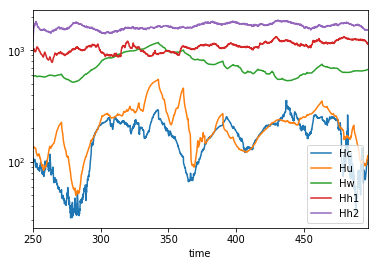

In [14]:
phase=['c','u','w','h1','h2']
for p in phase:
    hstp['H'+p]=np.sqrt(hstp['H2'+p]/hstp['M'+p])
    hstp.plot(x='time',y='H'+p,ax=plt.gca())
plt.yscale('log')
plt.show()

Reading a history file:G:/yeongu/RPS_8pc_noICM_newacc/hst/RPS_8pc_noICM_newacc.hst
Reading a history file:G:/yeongu/RPS_8pc_noICM_newacc/hst/RPS_8pc_noICM_newacc.hst.p
101.593049232


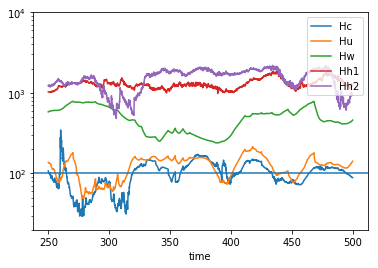

Reading a history file:G:/yeongu/RPS_8pc_ICM0_newacc/hst/RPS_8pc_ICM0_newacc.hst
Reading a history file:G:/yeongu/RPS_8pc_ICM0_newacc/hst/RPS_8pc_ICM0_newacc.hst.p
68.8286986683


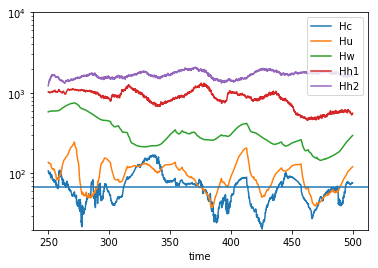

Reading a history file:G:/yeongu/RPS_8pc_ICM1_newacc/hst/RPS_8pc_ICM1_newacc.hst
Reading a history file:G:/yeongu/RPS_8pc_ICM1_newacc/hst/RPS_8pc_ICM1_newacc.hst.p
166.231121275


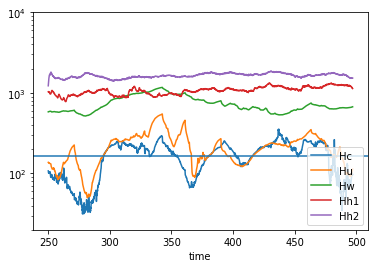

Reading a history file:G:/yeongu/RPS_4pc_ICM1_newacc/hst/RPS_4pc_ICM1_newacc.hst
Reading a history file:G:/yeongu/RPS_4pc_ICM1_newacc/hst/RPS_4pc_ICM1_newacc.hst.p
163.462119154


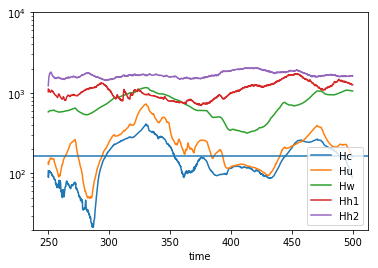

Reading a history file:G:/yeongu/RPS_8pc_ICM2_newacc/hst/RPS_8pc_ICM2_newacc.hst
Reading a history file:G:/yeongu/RPS_8pc_ICM2_newacc/hst/RPS_8pc_ICM2_newacc.hst.p
1283.95316625


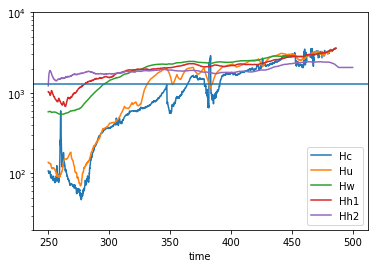

Reading a history file:G:/yeongu/RPS_4pc_ICM2_newacc/hst/RPS_4pc_ICM2_newacc.hst
Reading a history file:G:/yeongu/RPS_4pc_ICM2_newacc/hst/RPS_4pc_ICM2_newacc.hst.p
1240.44335129


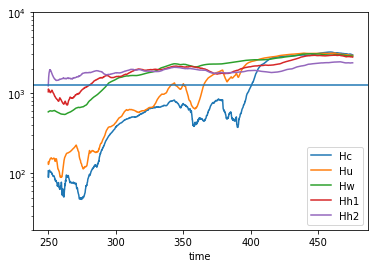

Reading a history file:G:/yeongu/RPS_8pc_ICM3_newacc/hst/RPS_8pc_ICM3_newacc.hst
Reading a history file:G:/yeongu/RPS_8pc_ICM3_newacc/hst/RPS_8pc_ICM3_newacc.hst.p
1458.78533173


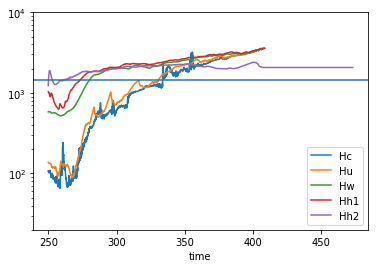

In [39]:
basedir='G:/yeongu/'
#id='RPS_8pc_ICM0_newacc'
ids = ('RPS_8pc_noICM_newacc','RPS_8pc_ICM0_newacc','RPS_8pc_ICM1_newacc','RPS_4pc_ICM1_newacc','RPS_8pc_ICM2_newacc','RPS_4pc_ICM2_newacc','RPS_8pc_ICM3_newacc')
for id in ids:
    hstfilename=basedir+id+'/hst/'+id+'.hst'
    hst=ath_hst.read(hstfilename)
    hstp=ath_hst.read_w_pandas(hstfilename)

    phase=['c','u','w','h1','h2']
    for p in phase:
        hstp['H'+p]=np.sqrt(hstp['H2'+p]/hstp['M'+p])
        hstp.plot(x='time',y='H'+p,ax=plt.gca())
        #print hstp['Hc']
    
    plt.axhline(np.mean(hstp['Hc']))
    print np.mean(hstp['Hc'])
    plt.yscale('log')
    plt.ylim(20,10000)
    plt.show()

# SN data
* id = id of the host star particle
* time = time of explosion
* age = age of the host star particle; for runaway, this is just indicator of clock. SN exploded as age exceeds zero
* mage = mass-weighted age of the host star particle; for runaway, this is time since runaway creation
* mass = mass of the host star particle. can be used to distinguish runaways
* (x1/x2/x3) = position of the host star particle
* (x1sn/x2sn/x3sn) = position of SN explosion; now it is identical to the star particle position, but possibly we can add a distribution from the center
* (n/v1/v2/v3/e)avg = mean gas properties within SNR
* vol = volume within SNR
* radius = radius of SNR
* SFUV = $\Sigma_{\rm FUV}$ for the host star particle
* SNRate = SN rate calculated based on the host star particle properties
* SNprob = randomly generated probability; this should be smaller than SNRate for explosion
* runaway = 1 if SN from runaways
* parent = parent star cluster id of the runaway
* mode = feedback type
* active = active flag of the host star particle
* fm = mass within the SNR/M_sf

In [9]:
sn=ath_hst.read_w_pandas(hstfilename.replace('.hst','.sn'))

NameError: name 'hstfilename' is not defined

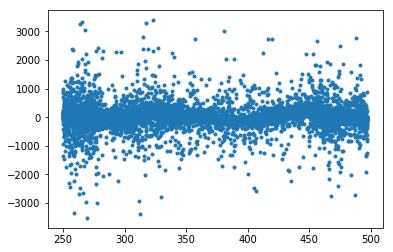

In [19]:
plt.plot(sn['time'],sn['x3'],'.')
plt.show()

In [20]:
runaway=sn['mass'] == 0.0
rsn=sn[runaway]
csn=sn[~runaway]

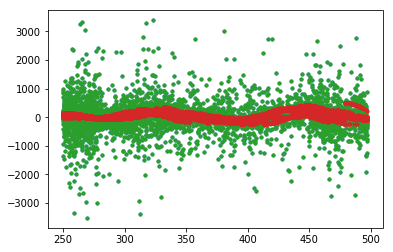

In [22]:
plt.plot(rsn['time'],rsn['x3'],'.')
plt.plot(csn['time'],csn['x3'],'.')
plt.show()

In [10]:
#basedir='G:/yeongu/'
id='RPS_8pc_ICM2_newacc'
#basedir='/media/woorak/data2/yeongu/' # for ubuntu
basedir='G:/yeongu/'
hstfilename=basedir+id+'/hst/'+id+'.hst'
sn=ath_hst.read_w_pandas(hstfilename.replace('.hst','.sn'))

Reading a history file:G:/yeongu/RPS_8pc_ICM2_newacc/hst/RPS_8pc_ICM2_newacc.sn.p


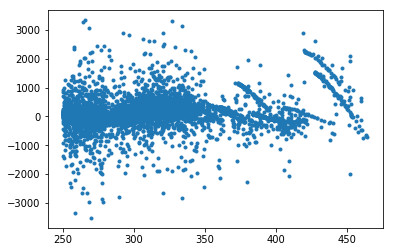

       id      time        age       mage       mass         x1         x2  \
0    6045  250.0002  23.387870  23.387870   625628.7 -296.36860  409.90480   
1    6627  250.0002   8.584933   8.582591   669401.9 -458.90150  439.89410   
2    6741  250.0056   0.001226   7.288911        0.0 -342.61700  443.78560   
3    7226  250.0281   0.000187   1.243674        0.0 -431.39980  414.81670   
4    6605  250.0347   0.000755   9.029359        0.0  206.26060  414.63790   
5    6180  250.0347   0.000131  18.414800        0.0   50.49977  245.52390   
6    6314  250.0427  15.074100  12.806050  2450763.0 -431.74860  433.90120   
7    6250  250.0517   0.000479  16.660440        0.0  113.31310  443.82930   
8    6463  250.0569   0.001274  12.025100        0.0   50.32692   42.36319   
9    6159  250.0609   0.000027  18.984180        0.0  199.46280  -32.30475   
10   7281  250.0617   0.000208   0.324154        0.0 -435.91940  427.53790   
11   5979  250.0630  27.635210  27.635210   335804.5 -291.04070 

In [15]:
plt.plot(sn['time'],sn['x3'],'.')
plt.show()
print sn[sn['time'] < 251]

In [27]:
runaway=sn['mass'] == 0.0
rsn=sn[runaway]
csn=sn[~runaway]

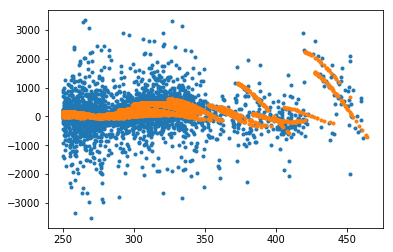

In [28]:
plt.plot(rsn['time'],rsn['x3'],'.')
plt.plot(csn['time'],csn['x3'],'.')
plt.show()

In [43]:
#basedir='G:/yeongu/'
id='RPS_4pc_ICM1_newacc'
#basedir='/media/woorak/data2/yeongu/' # for ubuntu
basedir='G:/yeongu/'
hstfilename=basedir+id+'/hst/'+id+'.hst'
sn=ath_hst.read_w_pandas(hstfilename.replace('.hst','.sn'))

Reading a history file:G:/yeongu/RPS_4pc_ICM1_newacc/hst/RPS_4pc_ICM1_newacc.sn.p


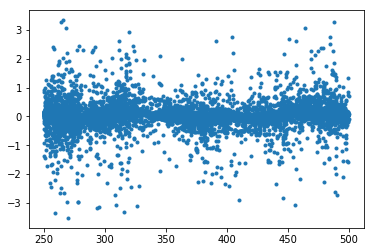

In [46]:
plt.plot(sn['time'],sn['x3']/1000,'.')
plt.show()

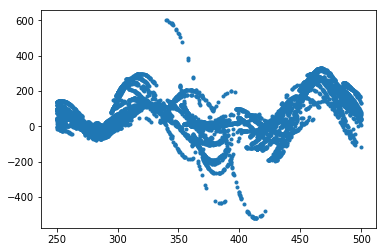

In [44]:
runaway=sn['mass'] == 0.0
rsn=sn[runaway]
csn=sn[~runaway]
#plt.plot(rsn['time'],rsn['x3'],'.')
plt.plot(csn['time'],csn['x3'],'.')
plt.show()

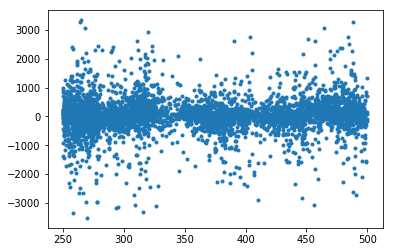

In [45]:
plt.plot(rsn['time'],rsn['x3'],'.')
#plt.plot(csn['time'],csn['x3'],'.')
plt.show()

In [35]:
#basedir='G:/yeongu/'
id='RPS_8pc_noICM_newacc'
#basedir='/media/woorak/data2/yeongu/' # for ubuntu
basedir='G:/yeongu/'
hstfilename=basedir+id+'/hst/'+id+'.hst'
sn=ath_hst.read_w_pandas(hstfilename.replace('.hst','.sn'))

Reading a history file:G:/yeongu/RPS_8pc_noICM_newacc/hst/RPS_8pc_noICM_newacc.sn


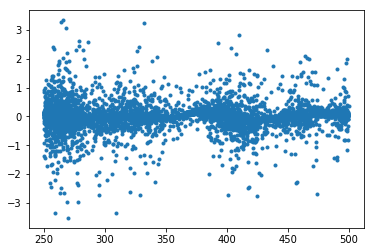

In [36]:
plt.plot(sn['time'],sn['x3']/1000,'.')
plt.show()

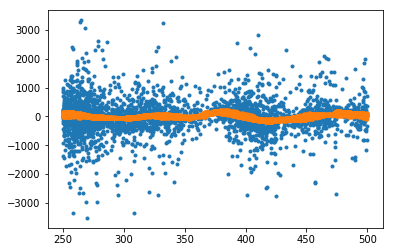

In [37]:
runaway=sn['mass'] == 0.0
rsn=sn[runaway]
csn=sn[~runaway]
plt.plot(rsn['time'],rsn['x3'],'.')
plt.plot(csn['time'],csn['x3'],'.')
plt.show()